In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df["bmi"].fillna(df["bmi"].mean(), inplace=True)

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Assuming 'stroke' is the target variable
y = df["stroke"]


In [ ]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
  df[col] = le.fit_transform(df[col])


In [ ]:
x=df.drop(['stroke'],axis=1)
y = df["stroke"]

In [ ]:
print(x)

         id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
1     51676       0  61.0             0              0             1   
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5108  37544       1  51.0             0              0             1   
5109  44679       0  44.0             0              0             1   

      work_type  Residence_type  avg_glucose_level        bmi  smoking_status  
0             2               1             228.69  36.

In [ ]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [ ]:
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
predictions = model.predict(x_test)

# Evaluate the model using mean squared error and R-squared score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error: ", mse)
print("R-squared Score: ", r2)

Mean Squared Error:  0.04293985568112887
R-squared Score:  0.09432377736216524


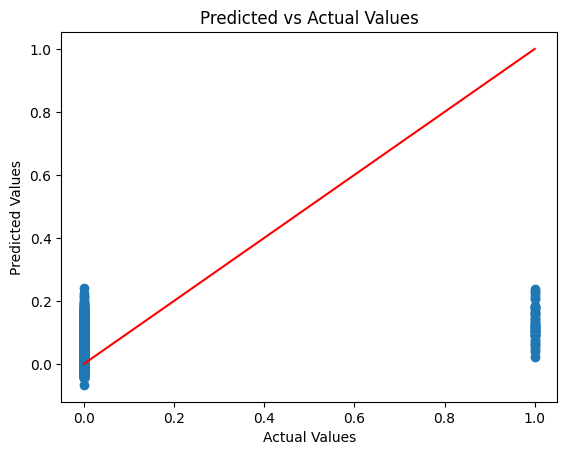

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
clf = svm.SVC(kernel='linear')

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(x_test)

In [ ]:
# Evaluate the classifier using accuracy score, classification report, and confusion matrix
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)

print("Accuracy Score: ", accuracy)
print("Classification Report: \n", report)
print("Confusion Matrix: \n", matrix)

Accuracy Score:  0.9403131115459883
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       971
           1       0.25      0.10      0.14        51

    accuracy                           0.94      1022
   macro avg       0.60      0.54      0.55      1022
weighted avg       0.92      0.94      0.93      1022

Confusion Matrix: 
 [[956  15]
 [ 46   5]]


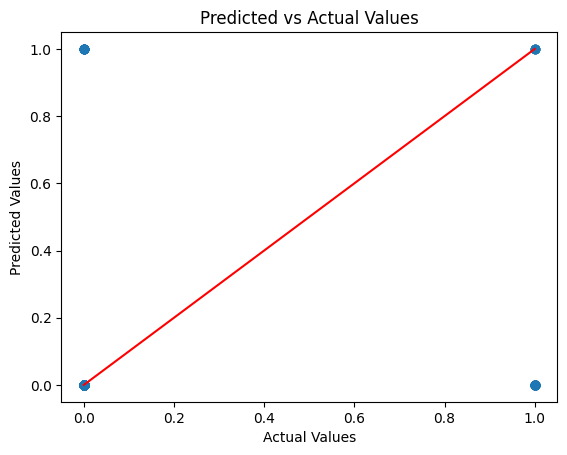

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(x_test)

# Evaluate the classifier using accuracy score, classification report, and confusion matrix
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)

print("Accuracy Score: ", accuracy)
print("Classification Report: \n", report)
print("Confusion Matrix: \n", matrix)

Accuracy Score:  0.9500978473581213
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       971
           1       0.00      0.00      0.00        51

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Confusion Matrix: 
 [[971   0]
 [ 51   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


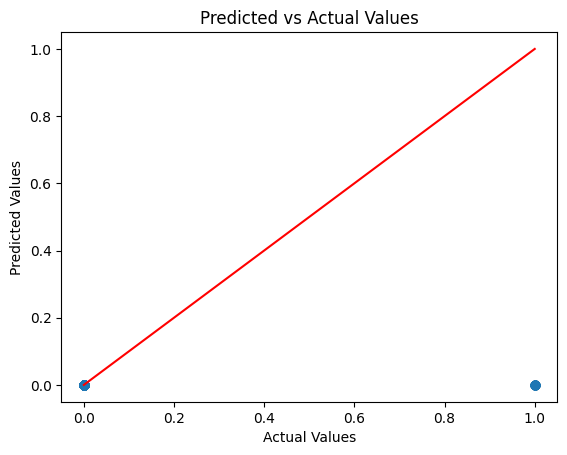

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

Epoch 1/50
8/8 [==============================] - 1s 33ms/step - loss: 0.8076 - accuracy: 0.4625 - val_loss: 0.7990 - val_accuracy: 0.5000
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 0.7688 - accuracy: 0.4625 - val_loss: 0.7694 - val_accuracy: 0.5000
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.7456 - accuracy: 0.4625 - val_loss: 0.7460 - val_accuracy: 0.5000
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.7238 - accuracy: 0.4625 - val_loss: 0.7321 - val_accuracy: 0.5000
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.7143 - accuracy: 0.4875 - val_loss: 0.7210 - val_accuracy: 0.5000
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.7023 - accuracy: 0.4875 - val_loss: 0.7146 - val_accuracy: 0.5000
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6948 - accuracy: 0.4625 - val_loss: 0.7096 - val_accuracy: 0.4500
Epoch 8/50
8/8 [================

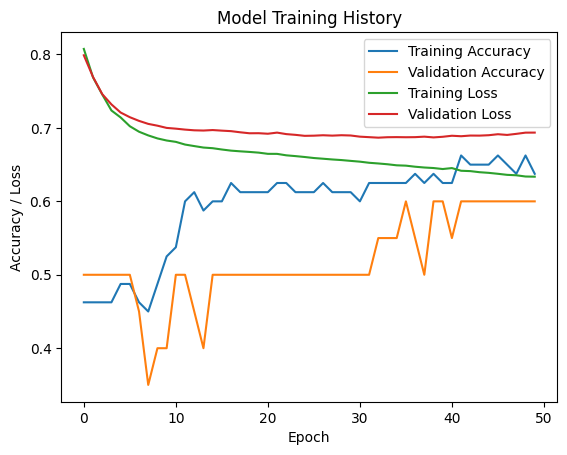

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming your data is stored in a DataFrame called df

# Define df with your data
# df = ...

# Extract features (X) and target variable (y)
#X = df.drop(columns=['id'])  # Remove 'id' column as it's not relevant for prediction
#y = df['stroke']  # Assuming 'stroke' is the target variable

# Placeholder for X and y (replace with your actual data)
X = np.random.rand(100, 10)  # Example X data
y = np.random.randint(2, size=100)  # Example y data

# Normalize the features
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential()
model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=1, validation_data=(x_test, y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()


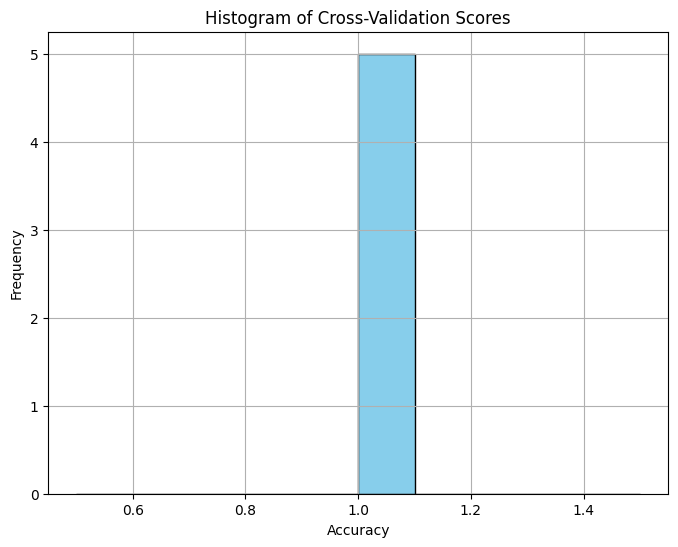

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the dataset
df = pd.DataFrame({
    'id': [9046, 51676, 31112, 60182, 1665],
    'gender': [1, 0, 1, 0, 0],
    'age': [67.0, 61.0, 80.0, 49.0, 79.0],
    'hypertension': [0, 0, 0, 0, 1],
    'heart_disease': [1, 0, 1, 0, 0],
    'ever_married': [1, 1, 1, 1, 1],
    'work_type': [2, 3, 2, 2, 3],
    'Residence_type': [1, 0, 0, 1, 0],
    'avg_glucose_level': [228.69, 202.21, 105.92, 171.23, 174.12],
    'bmi': [36.6, None, 32.5, 34.4, 24.0],
    'smoking_status': [1, 2, 2, 3, 2],
    'stroke': [1, 1, 1, 1, 1]
})

# Fill missing values in 'bmi' column with the mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Extract features (X) and target variable (y)
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation

# Plot histogram of cross-validation scores
plt.figure(figsize=(8, 6))
plt.hist(cv_scores, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of Cross-Validation Scores')
plt.grid(True)
plt.show()
